In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.regression import *
from xgboost import XGBRegressor, plot_importance
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

In [94]:
import plotly.express as px

In [2]:
df = pd.read_csv("Datas/data_frame_florian.csv")

In [39]:
df.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,heure
0,1,0,0,1,9.84,81,0.0,16,0
1,1,0,0,1,9.02,80,0.0,40,1
2,1,0,0,1,9.02,80,0.0,32,2
3,1,0,0,1,9.84,75,0.0,13,3
4,1,0,0,1,9.84,75,0.0,1,4


# pycaret

In [10]:
model_pc = setup(data=df,target="count")

,Description,Value
0,session_id,1554
1,Target,count
2,Original Data,"(10886, 10)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7620, 14)"


In [11]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,46.4723,4665.6666,68.1756,0.8544,0.4662,0.5161,0.1470
xgboost,Extreme Gradient Boosting,46.8919,4802.6399,69.2062,0.8499,0.5248,0.5512,57.3730
rf,Random Forest Regressor,46.9835,5061.6922,71.0117,0.8418,0.4329,0.4434,0.5170
et,Extra Trees Regressor,47.6544,5362.3959,73.0886,0.8324,0.4405,0.4494,0.4220
gbr,Gradient Boosting Regressor,57.9211,7155.6422,84.4636,0.7762,0.6562,0.8847,0.1550
dt,Decision Tree Regressor,60.9916,9518.2946,97.4206,0.7019,0.5511,0.5258,0.0170
ada,AdaBoost Regressor,91.9719,13504.7697,116.1151,0.5764,1.0140,2.3493,0.1110
knn,K Neighbors Regressor,86.1317,15818.6448,125.6354,0.5052,0.8912,1.7102,0.0180
br,Bayesian Ridge,106.5706,20967.0774,144.7058,0.3436,1.2039,3.1394,0.0090
ridge,Ridge Regression,106.6117,20967.4389,144.7059,0.3436,1.2043,3.1443,0.0090


# XGBoost

In [3]:
y = df.pop("count")
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)



In [4]:
df.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,heure
0,1,0,0,1,9.84,81,0.0,0
1,1,0,0,1,9.02,80,0.0,1
2,1,0,0,1,9.02,80,0.0,2
3,1,0,0,1,9.84,75,0.0,3
4,1,0,0,1,9.84,75,0.0,4


In [5]:
xgb = XGBRegressor()
cat_feature = ["season","weather"]
cat_pip = make_pipeline(OneHotEncoder())
num_feature = ["temp","humidity","windspeed","heure"]
num_pip = make_pipeline(StandardScaler())
preprocessor = make_column_transformer((cat_pip,cat_feature),(num_pip,num_feature),remainder="passthrough")

pip = make_pipeline(preprocessor,xgb)

In [6]:

model_xgb = pip.fit(X_train,y_train)

In [7]:
model_xgb.score(X_test,y_test)

0.8588667899172001

In [8]:
model_xgb[1]

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

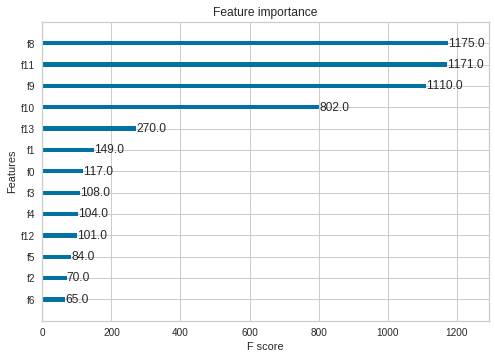

In [54]:
plot_importance(model_xgb[1])

In [80]:
xgb_score = model_xgb[1].get_booster().get_fscore()
xgb_score

{'f0': 117.0,
 'f1': 149.0,
 'f2': 70.0,
 'f3': 108.0,
 'f4': 104.0,
 'f5': 84.0,
 'f6': 65.0,
 'f8': 1175.0,
 'f9': 1110.0,
 'f10': 802.0,
 'f11': 1171.0,
 'f12': 101.0,
 'f13': 270.0}

In [48]:
model_xgb[0].transformers_[1]

('pipeline-2',
 Pipeline(steps=[('standardscaler', StandardScaler())]),
 ['temp', 'humidity', 'windspeed', 'heure'])

In [40]:
model_xgb[0].transformers_[0][1]["onehotencoder"].get_feature_names(cat_feature)


array(['season_1', 'season_2', 'season_3', 'season_4', 'weather_1',
       'weather_2', 'weather_3', 'weather_4'], dtype=object)

In [44]:
model_xgb[0].transformers_[2]


('remainder', 'passthrough', [1, 2])

In [49]:
X.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,heure
0,1,0,0,1,9.84,81,0.0,0
1,1,0,0,1,9.02,80,0.0,1
2,1,0,0,1,9.02,80,0.0,2
3,1,0,0,1,9.84,75,0.0,3
4,1,0,0,1,9.84,75,0.0,4


In [124]:
model_xgb[0].transformers_[0]

('pipeline-1',
 Pipeline(steps=[('onehotencoder', OneHotEncoder())]),
 ['season', 'weather', 'year'])

In [81]:
liste_feature = ['season_1', 'season_2', 'season_3', 'season_4', 'weather_1','weather_2', 'weather_3','temp', 'humidity', 'windspeed', 'heure',"holiday","workingday"]
len(liste_feature)
len(list(xgb_score.values()))

13

([<matplotlib.axis.YTick at 0x7f24d636abb0>,
 [Text(0, 0, 'season_1'),
  Text(0, 1, 'season_2'),
  Text(0, 2, 'season_3'),
  Text(0, 3, 'season_4'),
  Text(0, 4, 'weather_1'),
  Text(0, 5, 'weather_2'),
  Text(0, 6, 'weather_3'),
  Text(0, 7, 'temp'),
  Text(0, 8, 'humidity'),
  Text(0, 9, 'windspeed'),
  Text(0, 10, 'heure'),
  Text(0, 11, 'holiday'),
  Text(0, 12, 'workingday')])

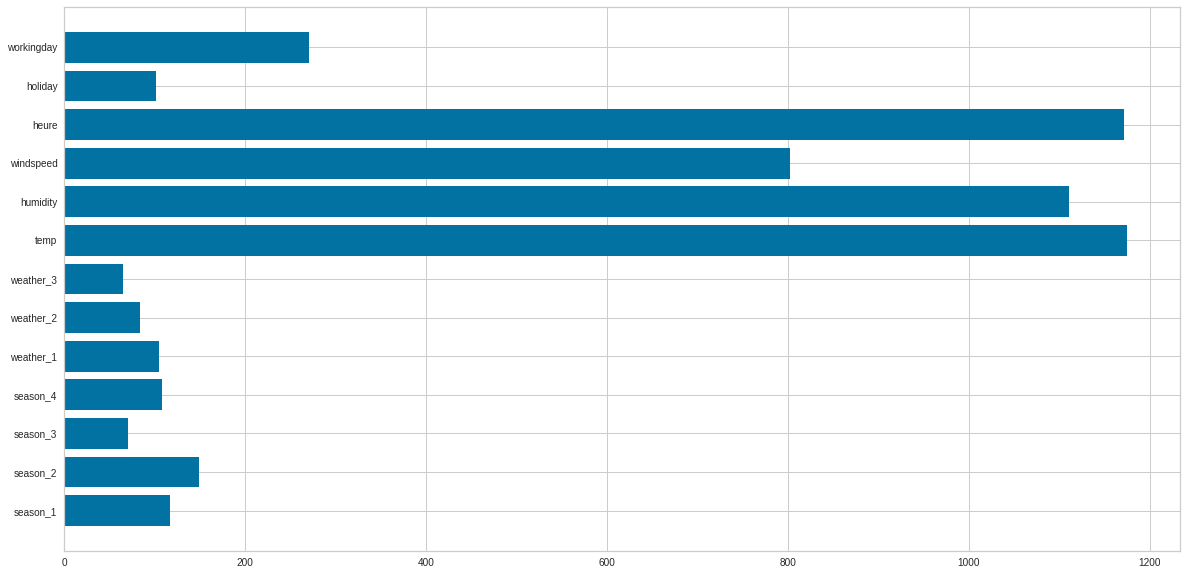

In [83]:
fig = plt.figure(figsize=(20,10))
y_pos = range(0,len(liste_feature))

plt.barh(y_pos,list(xgb_score.values()))
plt.yticks(y_pos,liste_feature)

In [75]:
list(xgb_score.values())

[117.0,
 149.0,
 70.0,
 108.0,
 104.0,
 84.0,
 65.0,
 1175.0,
 1110.0,
 802.0,
 1171.0,
 101.0,
 270.0]

XGBoost avec les bons train/test

In [163]:
X_test = pd.read_csv("Datas/data_frame_test_florian.csv")
X_train = pd.read_csv("Datas/data_frame_train_florian.csv")
date = X_test.pop("datetime")
X_train.pop("datetime")

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
               ...         
9034    2012-08-19 19:00:00
9035    2012-08-19 20:00:00
9036    2012-08-19 21:00:00
9037    2012-08-19 22:00:00
9038    2012-08-19 23:00:00
Name: datetime, Length: 9039, dtype: object

In [111]:
X_test.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,heure,month,year
0,3,0,0,1,30.34,62,7.0015,168,0,9,2012
1,3,0,0,1,29.52,74,8.9981,79,1,9,2012
2,3,0,0,1,28.70,70,11.0014,69,2,9,2012
3,3,0,0,1,28.70,70,7.0015,35,3,9,2012
4,3,0,0,1,28.70,70,0.0000,12,4,9,2012


In [164]:
y_train = X_train.pop("count")
y_test = X_test.pop("count")

In [194]:
X_train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,heure,month,year
0,1,0,0,1,9.84,81,0.0,0,1,2011
1,1,0,0,1,9.02,80,0.0,1,1,2011
2,1,0,0,1,9.02,80,0.0,2,1,2011
3,1,0,0,1,9.84,75,0.0,3,1,2011
4,1,0,0,1,9.84,75,0.0,4,1,2011


In [120]:
xgb = XGBRegressor()
cat_feature = ["season","weather","year"]
cat_pip = make_pipeline(OneHotEncoder())
num_feature = ["temp","humidity","windspeed","heure","month"]
num_pip = make_pipeline(StandardScaler())
preprocessor = make_column_transformer((cat_pip,cat_feature),(num_pip,num_feature),remainder="passthrough")

pip = make_pipeline(preprocessor,xgb)

In [165]:
model_xgb = pip.fit(X_train,y_train)
model_xgb.score(X_test,y_test)


0.9006326610144423

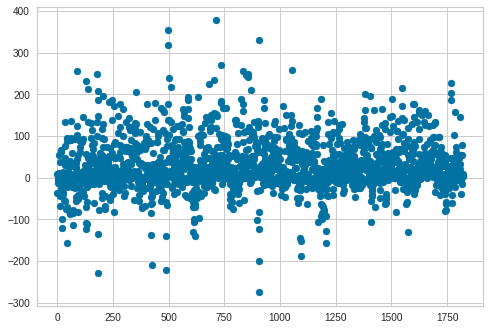

In [116]:
res = y_test - model_xgb.predict(X_test)

plt.scatter(range(0,len(res)),res)

In [117]:
X_test_res = X_test
X_test_res["res"] = res
X_test_res["date"] = date

fig = px.scatter(X_test_res,y="res",hover_data=["heure","humidity","temp","date"])
#fig.update_traces(mode="markers")
fig.show()

In [149]:
res.mean()

29.432841318571104

In [236]:
masque = [df_analyses["heure"]==3]
masque

[0        False
 1        False
 2        False
 3         True
 4        False
          ...  
 10881    False
 10882    False
 10883    False
 10884    False
 10885    False
 Name: heure, Length: 10886, dtype: bool]

In [244]:
dates_foireuses = list(X_test_res[abs(X_test_res["res"]) > 200]["date"])
df_analyses = pd.read_csv("Datas/train.csv")
df_analyses["datetime"] = pd.to_datetime(df_analyses["datetime"])

# for i in df_analyses["datetime"]:
#     if i in 
df_analyses["heure"] = [d.time().hour for d in df_analyses["datetime"]]
df_analyses["jour"] = [d.day for d in df_analyses["datetime"]]
df_analyses["mois"] = [d.month for d in df_analyses["datetime"]]

df_date = df_analyses[[str(d) in dates_foireuses for d in df_analyses["datetime"]]]

df_date.reset_index(inplace=True)


df_test = pd.DataFrame()
for i in range(0,df_date.shape[0]):
    masque = (df_analyses["heure"]==df_date.loc[i]["heure"]) & (df_analyses["mois"]==df_date.loc[i]["mois"]) & (df_analyses["jour"]==df_date.loc[i]["jour"])
    #masque = [(d["heure"]==row["heure"]) & (d["jour"]==row["jour"]) & (d["mois"]==row["mois"]) for d in df_analyses]
    df_test = df_test.append(df_analyses[masque])
    

df_test


# df_date["datetime"][9152]

# df_test = pd.DataFrame()
# for d in df_date:
#     df_test = df_test.append(d)
#     date = d["datetime"]
#     if 


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,heure,jour,mois
3691,2011-09-04 17:00:00,3,0,0,1,31.16,36.365,66,15.0013,204,172,376,17,4,9
9152,2012-09-04 17:00:00,3,0,1,1,31.16,36.365,70,23.9994,110,746,856,17,4,9
3729,2011-09-06 08:00:00,3,0,1,3,22.14,25.760,83,26.0027,15,349,364,8,6,9
9191,2012-09-06 08:00:00,3,0,1,3,28.70,33.335,79,0.0000,24,622,646,8,6,9
3738,2011-09-06 17:00:00,3,0,1,2,22.14,25.760,88,26.0027,15,276,291,17,6,9
9200,2012-09-06 17:00:00,3,0,1,1,30.34,34.850,70,16.9979,67,741,808,17,6,9
3780,2011-09-08 12:00:00,3,0,1,2,27.06,29.545,94,15.0013,17,85,102,12,8,9
9243,2012-09-08 12:00:00,3,0,0,1,32.80,37.880,55,32.9975,220,474,694,12,8,9
3783,2011-09-08 15:00:00,3,0,1,3,27.06,29.545,89,19.9995,24,115,139,15,8,9
9246,2012-09-08 15:00:00,3,0,0,3,22.96,26.515,88,16.9979,175,337,512,15,8,9


In [206]:
df_test = pd.DataFrame()
df_test = df_test.append(df_analyses.loc[0])
df_test


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1.0,0.0,0.0,1.0,9.84,14.395,81.0,0.0,3.0,13.0,16.0


importance ?

In [147]:
liste_feature.remove("weather_4")
liste_feature

['season_1',
 'season_2',
 'season_3',
 'season_4',
 'weather_1',
 'weather_2',
 'weather_3',
 'year_2011',
 'year_2012',
 'temp',
 'humidity',
 'windspeed',
 'heure',
 'month',
 'holiday',
 'workingday']

([<matplotlib.axis.YTick at 0x7f24d37a83a0>,
 [Text(0, 0, 'season_1'),
  Text(0, 1, 'season_2'),
  Text(0, 2, 'season_3'),
  Text(0, 3, 'season_4'),
  Text(0, 4, 'weather_1'),
  Text(0, 5, 'weather_2'),
  Text(0, 6, 'weather_3'),
  Text(0, 7, 'year_2011'),
  Text(0, 8, 'year_2012'),
  Text(0, 9, 'temp'),
  Text(0, 10, 'humidity'),
  Text(0, 11, 'windspeed'),
  Text(0, 12, 'heure'),
  Text(0, 13, 'month'),
  Text(0, 14, 'holiday'),
  Text(0, 15, 'workingday')])

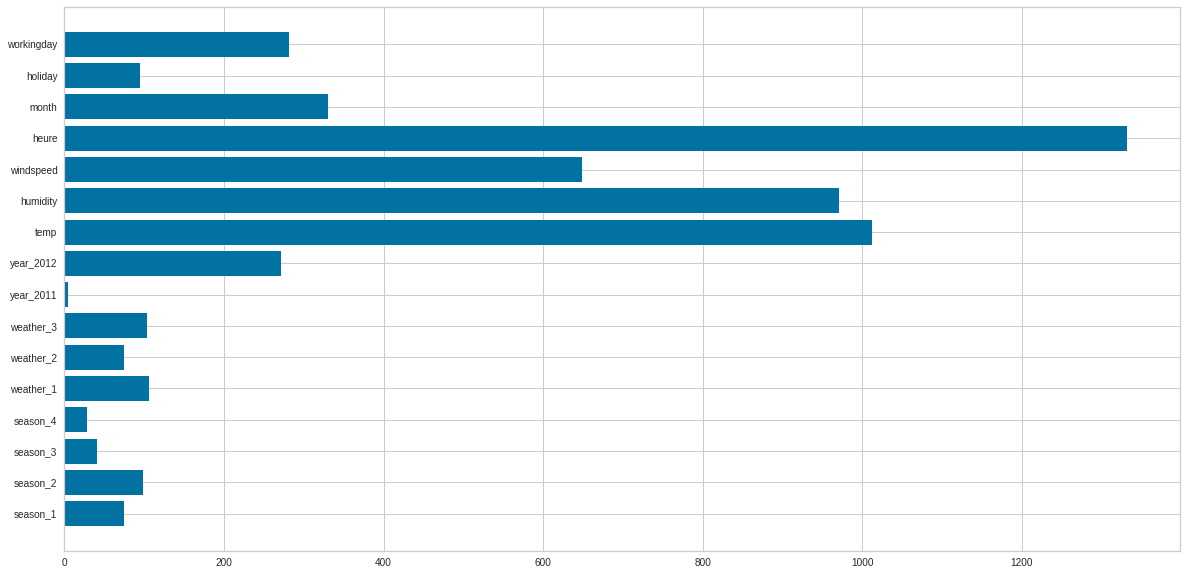

In [148]:
l_one_hot = list(model_xgb[0].transformers_[0][1]["onehotencoder"].get_feature_names(cat_feature))
l_standard = model_xgb[0].transformers_[1][2]
l_reminder = [ X_train.columns[i] for i in model_xgb[0].transformers_[2][2] ]

liste_feature = l_one_hot + l_standard + l_reminder
# a automatiser ???
liste_feature.remove("weather_4")

xgb_score = model_xgb[1].get_booster().get_fscore()


fig = plt.figure(figsize=(20,10))
y_pos = range(0,len(liste_feature))

plt.barh(y_pos,list(xgb_score.values()))
plt.yticks(y_pos,liste_feature)


In [139]:
test = [1,2,3,4,5]
[test[i] for i in l]

[2, 3]